In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv
/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv


In [61]:
train = pd.read_csv("../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("../input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")

In [62]:
## as per visuals and heatmap all the numerical values show loose relation so we drop them
trainNext=train.drop(labels=['ApplicantIncome'],axis=1)

In [63]:
trainNext=trainNext.drop(labels=['CoapplicantIncome'],axis=1)

In [64]:
trainNext=trainNext.drop(labels=['LoanAmount'],axis=1)

In [65]:
trainNext=trainNext.drop(labels=['Loan_Amount_Term'],axis=1)


In [66]:
trainNext=trainNext.drop(labels=['Loan_ID'],axis=1)

In [67]:
trainNext.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


##### Clean Categorical Data here

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
tr2 = trainNext

In [69]:
tr2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [70]:
tr2['Property_Area']=le.fit_transform(tr2['Property_Area'])
tr2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,2,Y
1,Male,Yes,1,Graduate,No,1.0,0,N
2,Male,Yes,0,Graduate,Yes,1.0,2,Y
3,Male,Yes,0,Not Graduate,No,1.0,2,Y
4,Male,No,0,Graduate,No,1.0,2,Y


In [71]:
tr2.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [72]:
tr2.dropna(inplace=True)
tr2['Dependents']=le.fit_transform(tr2['Dependents'])
tr2 = pd.get_dummies(tr2)
tr2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dependents              511 non-null    int64  
 1   Credit_History          511 non-null    float64
 2   Property_Area           511 non-null    int64  
 3   Gender_Female           511 non-null    uint8  
 4   Gender_Male             511 non-null    uint8  
 5   Married_No              511 non-null    uint8  
 6   Married_Yes             511 non-null    uint8  
 7   Education_Graduate      511 non-null    uint8  
 8   Education_Not Graduate  511 non-null    uint8  
 9   Self_Employed_No        511 non-null    uint8  
 10  Self_Employed_Yes       511 non-null    uint8  
 11  Loan_Status_N           511 non-null    uint8  
 12  Loan_Status_Y           511 non-null    uint8  
dtypes: float64(1), int64(2), uint8(10)
memory usage: 21.0 KB


In [73]:
# Reduce the Size but deleting Opposite same attribute class
tr2= tr2.drop(labels=['Education_Not Graduate','Gender_Female','Married_No','Self_Employed_No',"Loan_Status_N"],axis=1)
tr2.head()

,Dependents,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes,Loan_Status_Y
0,0,1.0,2,1,0,1,0,1
1,1,1.0,0,1,1,1,0,0
2,0,1.0,2,1,1,1,1,1
3,0,1.0,2,1,1,0,0,1
4,0,1.0,2,1,0,1,0,1


##### As data is converted into continous clean distru format
## Lets Again Analysis ka Baap
# Seaborn Heatmaps

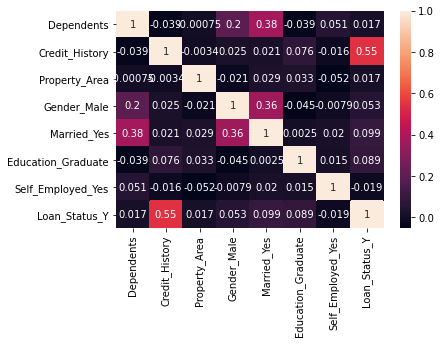

In [74]:
import seaborn as sb
sb.heatmap(tr2.corr(),annot=True)

##### Dropping Self Employed , Dependants , Education Graduate

In [76]:
tr2= tr2.drop(labels=['Education_Graduate','Dependents','Self_Employed_Yes'],axis=1)
tr2.head()

,Credit_History,Property_Area,Gender_Male,Married_Yes,Loan_Status_Y
0,1.0,2,1,0,1
1,1.0,0,1,1,0
2,1.0,2,1,1,1
3,1.0,2,1,1,1
4,1.0,2,1,0,1


In [77]:
## Exporting X And Y
tr2.to_csv("Loan-Clean-Data.csv")